<a href="https://colab.research.google.com/github/sujajohn26/sujajohn26.github.io/blob/main/OrderData_DSP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Load the dataset
df = pd.read_csv('FactOrder.csv')

In [ ]:
df

,OrderNumber,OrderRowNumber,ArticleKey,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,DateOrderedKey,QuantityOrdered
0,94444500,1,31182,NaN,Övrigt,NaN,VAT,Base,NaN,NaN,NaN,20180102,1.0
1,94543600,2,47942,red,DRESSES LS WOVEN,116/122,DRESSES,Main,6[116-122],3 KIDS,NaN,20180103,1.0
2,94543600,3,6763,light grey,SWEATSHIRTS,92/98,TOPS,Main,4[92-98],2 TODDLER,NaN,20180103,1.0
3,94543700,1,20870,offwhite,TEES LS,80/86,TOPS,Main,3[80-86],2 TODDLER,NaN,20180103,1.0
4,94543700,2,38070,light grey,SWEATSHIRTS,80/86,TOPS,Main,3[80-86],2 TODDLER,NaN,20180103,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252855,116135100,3,56158,Blue,TEES LS,104/110,TOPS,Main,5[104-110],3 KIDS,JERSEY,20201223,1.0
1252856,116135100,4,33839,Blue,TROUSERS JERSEY,92/98,BOTTOMS,Main,4[92-98],2 TODDLER,JERSEY,20201223,1.0
1252857,116135100,5,54492,Offwhite,LEGGINGS,92/98,BOTTOMS,Pre,4[92-98],2 TODDLER,JERSEY,20201223,1.0
1252858,116135100,6,35487,Offwhite,TEES SS,104/110,TOPS,Pre,5[104-110],3 KIDS,JERSEY,20201223,1.0


In [ ]:
df['DateOrderedKey'] = pd.to_datetime(df['DateOrderedKey'], format='%Y%m%d')

In [ ]:
df.set_index('DateOrderedKey', inplace=True)

In [ ]:
monthly_df = df.groupby([pd.Grouper(freq='M'), 'ArticleGroupName'])['QuantityOrdered'].sum()

In [ ]:
monthly_df

DateOrderedKey  ArticleGroupName
2018-01-31      ACCESSORIES          5293.0
                BODY AND ONESIE      6293.0
                BOTTOMS             19923.0
                Cancellation fee        4.0
                DRESSES             10926.0
                                     ...   
2021-01-31      DRESSES                32.0
                HATS                   49.0
                OUTERWEAR             157.0
                SWIMWEAR                4.0
                TOPS                  108.0
Name: QuantityOrdered, Length: 628, dtype: float64

In [ ]:
monthly_df = df.groupby([pd.Grouper(freq='M'), 'ArticleGroupName'])['QuantityOrdered'].sum().unstack().fillna(0)

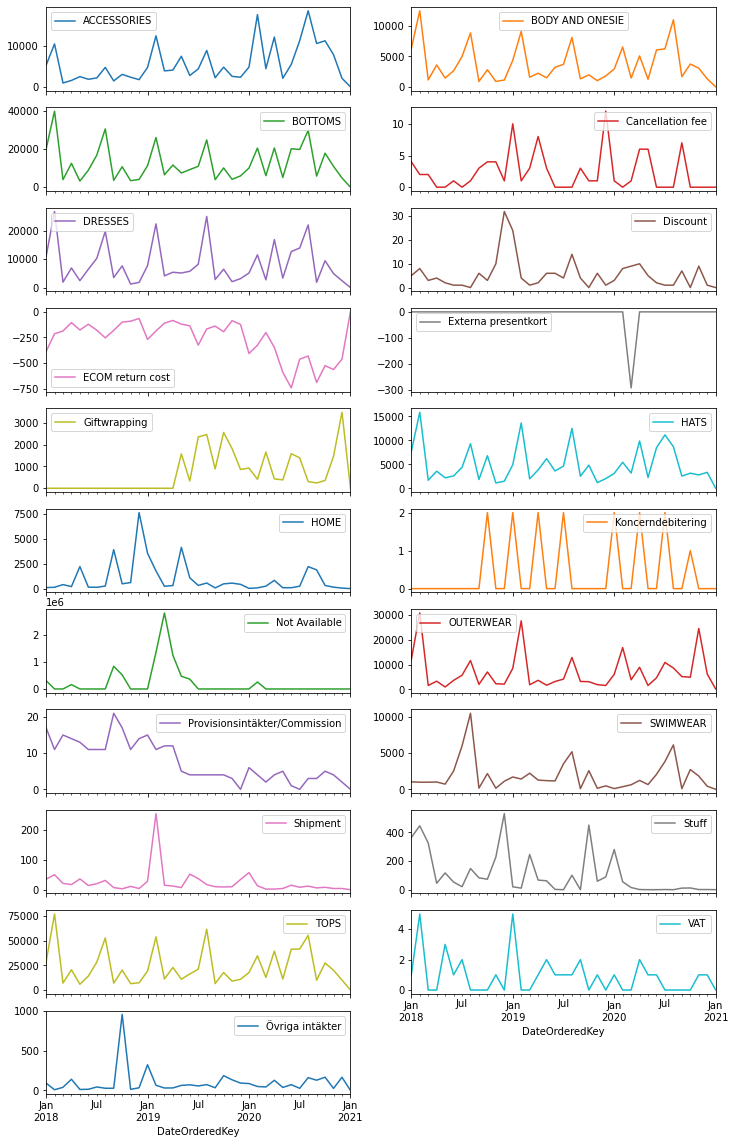

In [ ]:
monthly_df.plot(subplots=True, figsize=(12, 20), layout=(-1, 2))
plt.show()

In [ ]:
summary_df = pd.DataFrame(index=monthly_df.columns, columns=['February', 'March', 'April', 'May', 'June','July'])

for group in monthly_df.columns:
    group_df = monthly_df[[group]].resample('M').sum()
    train_data = group_df.loc[:'2020-01-31']
    test_data = group_df.loc['2020-02-29':]
    model = ARIMA(train_data, order=(1, 1, 1))
    fit_model = model.fit()
    steps = 365
    preds = fit_model.forecast(steps, exog=None, alpha=0.05)

    summary_df.loc[group] = [int(preds[0]), int(preds[1]), int(preds[2]), int(preds[3]), int(preds[4]), int(preds[5])]

# Print the summary dataframe
print(summary_df)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                              February  March  April    May   June   July
ArticleGroupName                                                         
ACCESSORIES                       4046   4014   4013   4013   4013   4013
BODY AND ONESIE                   3432   3461   3463   3463   3463   3463
BOTTOMS                          11520  11507  11507  11507  11507  11507
Cancellation fee                     2      2      2      2      2      2
DRESSES                           7876   7780   7783   7783   7783   7783
Discount                             4      5      5      5      5      5
ECOM return cost                  -223   -188   -181   -180   -180   -180
Externa presentkort                  0      0      0      0      0      0
Giftwrapping                      1086   1034   1051   1046   1047   1047
HATS                              4902   4788   4795   4795   4795   4795
HOME                               900   1080   1117   1125   1126   1127
Koncerndebitering                    0